# Document Clustering 

### Downloadwikipedia articles 

In [1]:
!pip install wikipedia

## A list of 10 different topics of wikipedia articles and combining all the articles

In [2]:
import pandas as pd
import wikipedia
articles=['Data Science','Artificial intelligence','Machine learning courses',
          'European Central Bank','Central Bank','Financial technology','International Monetary Fund',
          'Basketball','Swimming','Football']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Data Science
loading content:  Artificial intelligence
loading content:  Machine learning courses
loading content:  European Central Bank
loading content:  Central Bank
loading content:  Financial technology
loading content:  International Monetary Fund
loading content:  Basketball
loading content:  Swimming
loading content:  Football
examine content


['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of informa

## TF-IDF Frequency

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [4]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '0001', '001', '01', '025', '03', '048', '05', '050', '06', '08', '10', '100', '100k', '101', '102nd', '104th', '106', '106th', '107th', '11', '110', '110th', '117', '1174', '1183', '12', '120', '1219', '122', '123', '127', '1280', '12th', '13', '1308', '1314', '1321', '135', '1350', '1363', '137', '14', '140', '1409', '1424', '143', '1450', '1486', '15', '150', '1500', '1519', '1526', '1538', '1580', '1584', '1586', '15th', '16', '160', '1600', '1601', '1602', '1610', '1613', '162', '1633', '1636', '165', '1659', '1660', '1667', '16th', '17', '1725', '173', '1739', '177', '1796', '17th', '18', '180', '1800', '1810', '1811', '1812', '1815', '1820s', '1821', '1823', '1824', '1825', '1830', '1834', '1839', '1840s', '1841', '1845', '1850', '1850s', '1851', '1852', '1853', '1855', '1856', '1857', '1858', '1859', '1860', '1860s', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1870s', '1871', '1872', '1873', '1874', '1876', '1877', '1878', '187

In [5]:
print(X[0,])

  (0, 7077)	0.005937659913642318
  (0, 4545)	0.016059874323784633
  (0, 8475)	0.009536688176725155
  (0, 6335)	0.009536688176725155
  (0, 6338)	0.008621393864454131
  (0, 7922)	0.0065035793476285
  (0, 2009)	0.01194420209551965
  (0, 1994)	0.01194420209551965
  (0, 7068)	0.0065035793476285
  (0, 7072)	0.009536688176725155
  (0, 2700)	0.013652360404990134
  (0, 8659)	0.008621393864454131
  (0, 4045)	0.007129174257930659
  (0, 8498)	0.02123850315178696
  (0, 1854)	0.013652360404990134
  (0, 8377)	0.01194420209551965
  (0, 9064)	0.013652360404990134
  (0, 8338)	0.0065035793476285
  (0, 1059)	0.013652360404990134
  (0, 5945)	0.013652360404990134
  (0, 1189)	0.005937659913642318
  (0, 9040)	0.013652360404990134
  (0, 4960)	0.01194420209551965
  (0, 1801)	0.00782852986725467
  (0, 8466)	0.008621393864454131
  :	:
  (0, 1483)	0.02123850315178696
  (0, 542)	0.00782852986725467
  (0, 546)	0.027304720809980268
  (0, 873)	0.01061925157589348
  (0, 8977)	0.013652360404990134
  (0, 8225)	0.01365236

## Perform Elbow Method to find optimum number of clusters 

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

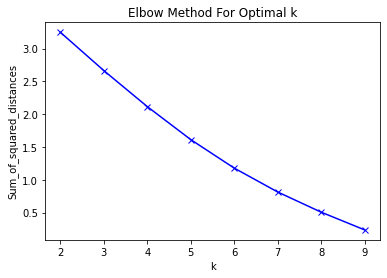

In [7]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


## K-Means Clustering 

In [8]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
1      Artificial intelligence        0
2     Machine learning courses        0
7                   Basketball        1
9                     Football        1
8                     Swimming        2
3        European Central Bank        3
4                 Central Bank        3
6  International Monetary Fund        3
5         Financial technology        4
0                 Data Science        5


## Wordcloud for Easy-Visualization 

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Cluster: 0
Titles
  Artificial intelligence
 Machine learning courses


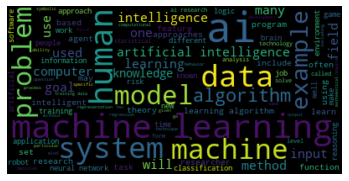

Cluster: 1
Titles
 Basketball
   Football


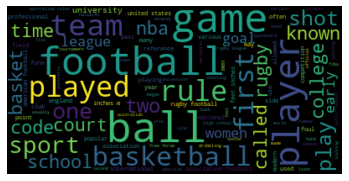

Cluster: 2
Titles
 Swimming


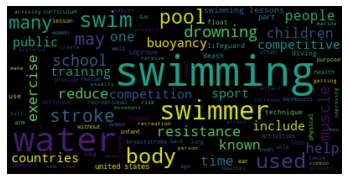

Cluster: 3
Titles
       European Central Bank
                Central Bank
 International Monetary Fund


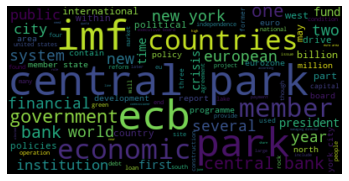

Cluster: 4
Titles
 Financial technology


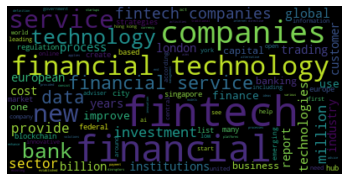

Cluster: 5
Titles
 Data Science


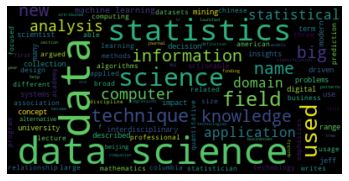

In [10]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()